# Introduction to text analysis

## Text preprocessing using NLTK

The "Natural Language Toolkit" (NLTK) has a book associated: http://www.nltk.org/book_1ed/ch01.html

And I like a lot this blog: https://vprusso.github.io/blog/2018/natural-language-processing-python-1/

**You need:**

**pip install nltk**

**pip install PyPDF2**

**pip install wordcloud**

In [127]:
import nltk
import PyPDF2 
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from matplotlib import pyplot as plt

%matplotlib inline

### Tokens 

In [128]:
example = "Hola a todos! My favorite Chilean word is 'achuntar' and I do love chirimoyas"

In [129]:
print(sent_tokenize(example))

['Hola a todos!', "My favorite Chilean word is 'achuntar' and I do love chirimoyas"]


In [130]:
wordTokens = word_tokenize(example)
print(wordTokens)

['Hola', 'a', 'todos', '!', 'My', 'favorite', 'Chilean', 'word', 'is', "'achuntar", "'", 'and', 'I', 'do', 'love', 'chirimoyas']


### Stopwords

In [131]:
stopwordsSpanish= set(stopwords.words('spanish'))
stopwords= set(stopwords.words('english'))

In [132]:
#stopwordsSpanish

In [133]:
filtered = [w for w in wordTokens if not w in stopwordsSpanish]
print(filtered)

['Hola', '!', 'My', 'favorite', 'Chilean', 'word', 'is', "'achuntar", "'", 'and', 'I', 'do', 'love', 'chirimoyas']


In [134]:
filtered = [w for w in wordTokens if not w in stopwords]
print(filtered)

['Hola', 'todos', '!', 'My', 'favorite', 'Chilean', 'word', "'achuntar", "'", 'I', 'love', 'chirimoyas']


### Stemming vs. lemmatization (English) 

From Wikipedia: "Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base, or root form, **generally a written word form**."

In [135]:
from nltk.stem import PorterStemmer 
ps = PorterStemmer()

In [136]:
exampleWords = ["loved", "loves","lovely", "loving"]

In [137]:
for w in exampleWords:
    print(ps.stem(w))

love
love
love
love


Lemmatization: "The process of grouping together the inflected forms of a word so they can be analyzed as a single item, identified by the word’s lemma, or dictionary form".

"Lemmatization and stemming are related, but different. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meaning depending on part of speech." https://vprusso.github.io/blog/2018/natural-language-processing-python-5/

In [138]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [139]:
for w in exampleWords:
    print(lemmatizer.lemmatize(w))

loved
love
lovely
loving


One can lemmatize using "Part of the speech" (POS) information, where n=noun, v=verb, a=adjective, r= adverb

In [140]:
print(lemmatizer.lemmatize("loving",pos='v'))

love


In [141]:
print(lemmatizer.lemmatize("loving",pos='a'))

loving


## WordNet

From Wikipedia: "WordNet is a lexical database for the English language. It groups English words into sets of synonyms called synsets, which provide short definitions and usage examples and records a number of relations among these synonym sets or their members."

In [142]:
from nltk.corpus import wordnet

In [143]:
syns = wordnet.synsets("program")
print(syns[0].name())

plan.n.01


In [144]:
print(syns[0].definition())

a series of steps to be carried out or goals to be accomplished


In [145]:
print(syns[0].examples())

['they drew up a six-step plan', 'they discussed plans for a new bond issue']


In [146]:
synonyms = []
antonyms = []

for syn in wordnet.synsets("good"):
    for l in syn.lemmas():
        synonyms.append(l.name())
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())

print(set(synonyms))

{'near', 'estimable', 'respectable', 'beneficial', 'dependable', 'secure', 'in_force', 'proficient', 'good', 'in_effect', 'just', 'upright', 'expert', 'well', 'skillful', 'safe', 'ripe', 'adept', 'practiced', 'serious', 'unspoiled', 'unspoilt', 'commodity', 'full', 'effective', 'honest', 'undecomposed', 'honorable', 'skilful', 'dear', 'trade_good', 'thoroughly', 'sound', 'salutary', 'soundly', 'right', 'goodness'}


In [147]:
print(set(antonyms))

{'badness', 'bad', 'evil', 'ill', 'evilness'}


<3

There are far more resources for English than other languages, but there are many iniciatives to improve that. For example: http://multiwordnet.fbk.eu/english/home.php 

If for example, you do clinical text analysis in Spanish, you fight for building a corpus! Because clinical text is also less available for patient's data protection, one solucion can be build a biomedical corpus based on medical publications in Chilean medical journals http://corpusmedico.cimt.cl/

## Analysing a book

*Corpus* means "body of text" and several corpus are called **corpora**. There is a variety of corpus, and can go from collections of books, the whole Wikipedia, social media, legal text, etc. The idea is to have a balanced corpus.

Let's consider books: the Gutenberg project has a bunch of books to be donwload in txt https://pypi.org/project/Gutenberg/ (There are some books in Spanish too http://www.gutenberg.org/ebooks/search/?query=spanish). 

In [148]:
# This are the books available
print(nltk.corpus.gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


Let's practice with Alice in Wonderland 

In [149]:
from nltk.text import Text
alice = Text(nltk.corpus.gutenberg.words('carroll-alice.txt'))

In [150]:
print(len(alice)) 

34110


In [151]:
#unique words
print(len(set(alice))) 

3016


In [152]:
alice.concordance("rabbit")

Displaying 25 of 51 matches:
Carroll 1865 ] CHAPTER I . Down the Rabbit - Hole Alice was beginning to get v
the daisies , when suddenly a White Rabbit with pink eyes ran close by her . T
ERY much out of the way to hear the Rabbit say to itself , ' Oh dear ! Oh dear
eemed quite natural ); but when the Rabbit actually TOOK A WATCH OUT OF ITS WA
nd that she had never before seen a rabbit with either a waistcoat - pocket , 
 in time to see it pop down a large rabbit - hole under the hedge . In another
orld she was to get out again . The rabbit - hole went straight on like a tunn
nother long passage , and the White Rabbit was still in sight , hurrying down 
hen she turned the corner , but the Rabbit was no longer to be seen : she foun
 what was coming . It was the White Rabbit returning , splendidly dressed , wi
ask help of any one ; so , when the Rabbit came near her , she began , in a lo
ice , ' If you please , sir --' The Rabbit started violently , dropped the whi
 see that she had put o

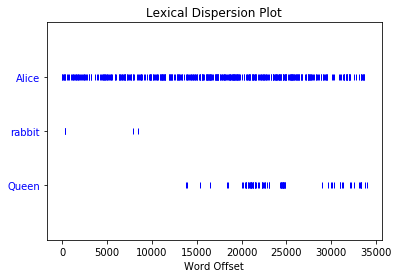

In [153]:
alice.dispersion_plot(["Alice", "rabbit", "Queen"])

## Word counting

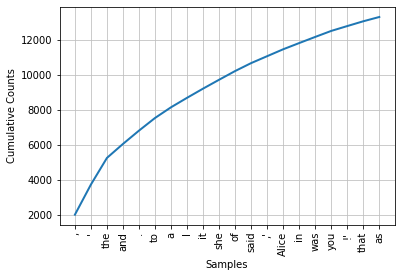

In [154]:
fdist = nltk.FreqDist(alice)
fdist.plot(20, cumulative=True)

Deleating all what is not alphabetic

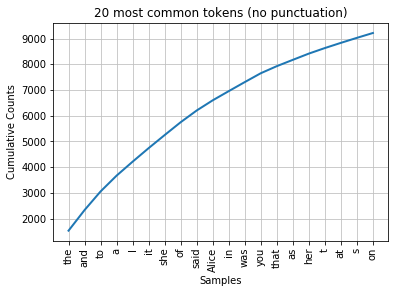

In [155]:
fdist_no_punc = nltk.FreqDist(dict((word, freq) for word, freq in fdist.items() if word.isalpha()))
fdist_no_punc.plot(20, cumulative=True, title="20 most common tokens (no punctuation)")

Eliminating stopwords

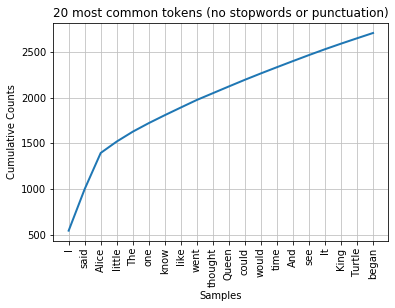

In [156]:
fdist_no_punc_no_stopwords = nltk.FreqDist(dict((word, freq) for word, freq in fdist.items() if word not in stopwords and word.isalpha()))
fdist_no_punc_no_stopwords.plot(20, cumulative=True, title="20 most common tokens (no stopwords or punctuation)")

## Wordclouds

In [157]:
#pip install wordcloud 
#pip install matplotlib

In [158]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Text taken from: http://www.aura-o.aura-astronomy.org/winter_school/

In [159]:
description = "La Serena School for Data Science The volume and complexity of astronomical data continues to grow as the current generation of surveys come online (PanSTARRS, Dark Energy Survey, VISTA). Astronomers will need to work with giga, tera and even petabytes of data in real time (LSST). This poses the challenges of developing and using new tools for data discovery, access, and analysis. At the same time, there are new opportunities for interdisciplinary research in applied mathematics, statistics, machine learning, crowd-sourcing, etc. Astronomy provides a sand-box where scientists can come together from diverse fields to address common challenges within the Big Data paradigm .The LA SERENA SCHOOL FOR DATA SCIENCE: Applied Tools for Data-driven Sciences is an intensive week of interdisciplinary lectures focused on applied tools for handling big astronomical data. Participants will be instructed in how astronomical data are processed, accessed and analyzed, including reduction pipelines, databases, and scientific programming.  The School will be taught by an international and interdisciplinary group of professors who will use real data and examples.  Participants will work on team-based projects and be provided training and access to the National Laboratory for High Performance Computing located at the University of Chile's Center for Mathematical Modeling. "

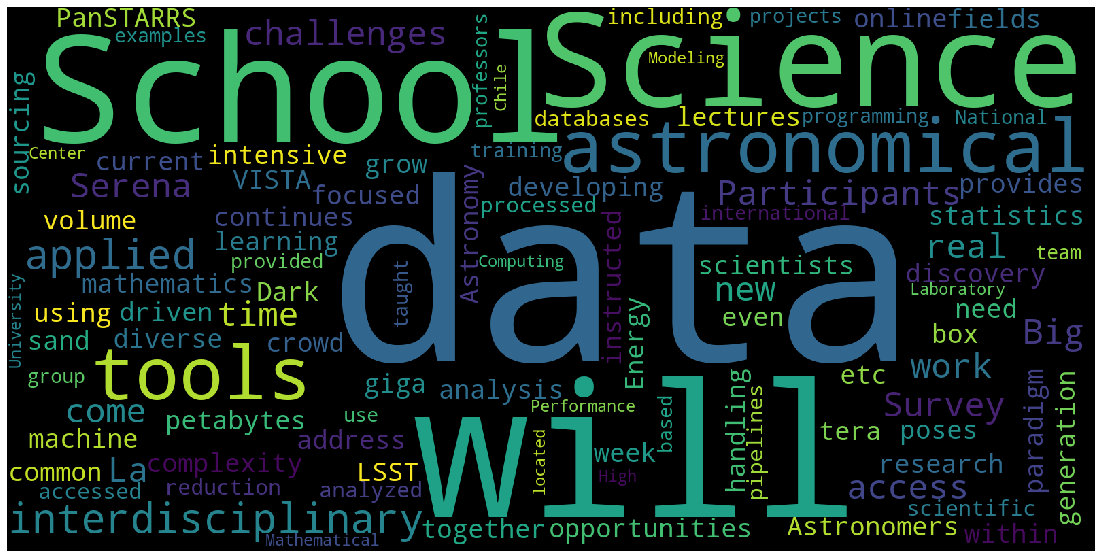

In [160]:
wordcloud = WordCloud(width=1600, height=800).generate(description)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Let's improve it! Do I want to differentiate between lower and upper case? Do I want "will" to be so big?

In [161]:
import re
v1 = nltk.word_tokenize(description)
v2 = [w.lower() for w in v1]
v22 = []
for word in v2:
    word = re.sub('[^A-Za-z]', '', word)
    if len(word) == 0:
        pass
    else:
        v22.append(word)
des= [word for word in v22 if not word in stopwordsSpanish and not word in stopwords]        

In [162]:
filteredDes = []
filteredDes = " ".join(word for word in des)
filteredDes

'serena school data science volume complexity astronomical data continues grow current generation surveys come online panstarrs dark energy survey vista astronomers need work giga tera even petabytes data real time lsst poses challenges developing using new tools data discovery access analysis time new opportunities interdisciplinary research applied mathematics statistics machine learning crowdsourcing etc astronomy provides sandbox scientists come together diverse fields address common challenges within big data paradigm serena school data science applied tools datadriven sciences intensive week interdisciplinary lectures focused applied tools handling big astronomical data participants instructed astronomical data processed accessed analyzed including reduction pipelines databases scientific programming school taught international interdisciplinary group professors use real data examples participants work teambased projects provided training access national laboratory high performan

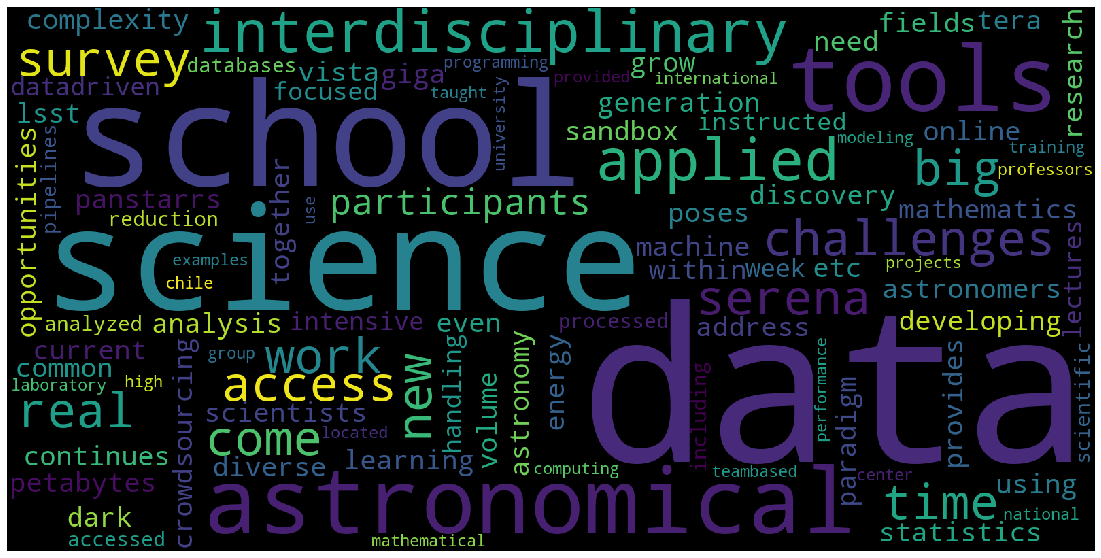

In [163]:
wordcloud = WordCloud(width=1600, height=800).generate(filteredDes)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Introducing masks!

In [164]:
import numpy as np
from PIL import Image

In [165]:
maskHeart = np.array(Image.open("heart.png"))
maskHeart=255-maskHeart

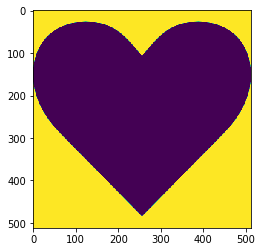

In [166]:
plt.imshow(maskHeart)

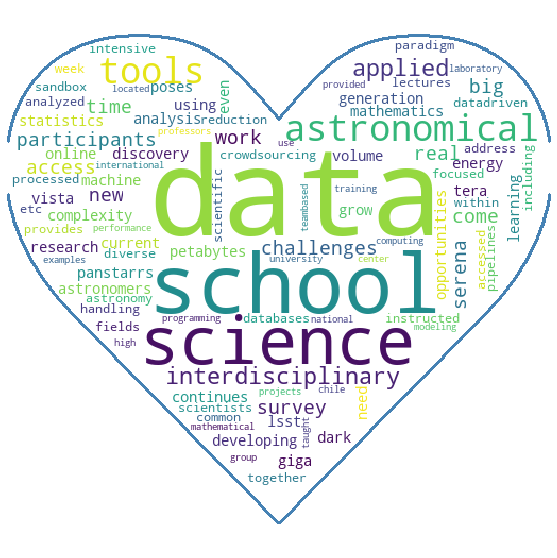

In [167]:
#stopwords = set(STOPWORDS)
#stopwords.add("taught")

wc = WordCloud(background_color="white", max_words=2000, mask=maskHeart,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(filteredDes)

# store to file
wc.to_file("schoolHeart.png")


plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

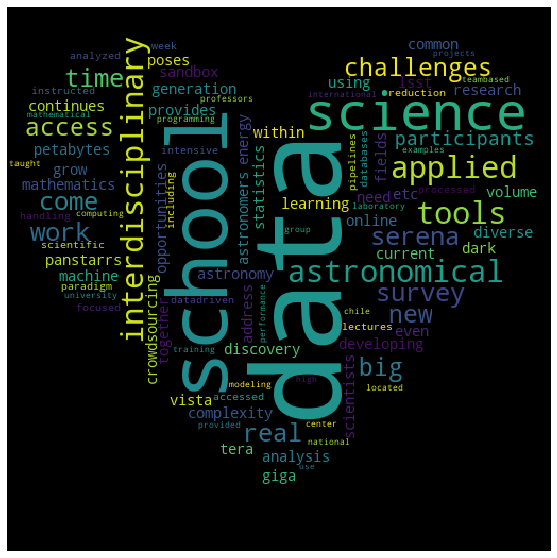

In [168]:
wordcloud = WordCloud(mask=maskHeart).generate(filteredDes)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

If you google "silhouette" you will find a bunch of masks!

### Frequentist analysis

In [169]:
#filteredDes
#des

In [170]:
fdistSchool = nltk.FreqDist(des)
#fdistSchool
#fdistSchool.most_common(10)

What if you don't want to do "by hand" the stopword selection? What if they are not trivial? (think in the word "patients" in the context of clinical text. Can I consider "patient" has a stopword?

There is a method called "Term frequency, inverse document frequency" TF-IDF that compares the frequency of a term in a document given the frequency of the same term when all the documents are consider. 

$$w_{i,j} = tf_{i,j} \times \log \left( \frac{N}{df_i} \right)$$

where $tf_{i,j}$ is the number of times $i$ occurs in $j$, $df_i$ is the number of documents that contains $i$ and $N$ is the total number of documents (implemented in sklearn).

If you want to learn more about this, ask Fabián Villena, student at the School:
https://cimt.uchile.cl/lechile/

### Analysis of your favorite papers

The problem here is that all this methods use a txt file to start with, and PDFs contained figures and metadata. I'm going to show you an example that doesn't work that well!

You need to:

pip install PyPDF2 


In [171]:
import PyPDF2 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from matplotlib import pyplot as plt

%matplotlib inline

In [172]:
filename = 'obesityML.pdf' 

pdfFileObj = open(filename,'rb')

pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

num_pages = pdfReader.numPages
count = 0
text = ""

while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()
#This if statement exists to check if the above library returned #words. It's done because PyPDF2 cannot read scanned files.
if text != "":
   text = text
#If the above returns as False, we run the OCR library textract to #convert scanned/image based PDF files into text
else:
   text = textract.process(fileurl, method='tesseract', language='eng')


In [173]:
num_pages

19

In [174]:
tokens = word_tokenize(text)
stopwords= stopwords.words('english')
punctuations = ['(',')',';',':','[',']',',']

In [175]:
tokens

['https',
 ':',
 '//doi.org/10.1177/1460458219845959Health',
 'Informatics',
 'Journal',
 '1',
 'Ð12©',
 'The',
 'Author',
 '(',
 's',
 ')',
 '2019Article',
 'reuse',
 'guidelines',
 ':',
 'sagepub.com/journals-permissionsDOI',
 ':',
 '10.1177/1460458219845959journals.sagepub.com/home/jhiPredicting',
 'nationwide',
 'obesity',
 'from',
 'food',
 'sales',
 'using',
 'machine',
 'learningJocelyn',
 'DunstanJohns',
 'Hopkins',
 'University',
 ',',
 'USA',
 ';',
 'University',
 'of',
 'Chile',
 ',',
 'ChileMarcela',
 'AguirreUniversity',
 'of',
 'Chile',
 ',',
 'ChileMagdalena',
 'Bast™asUniversity',
 'of',
 'Chile',
 ',',
 'ChileClaudia',
 'Nau',
 'and',
 'Thomas',
 'A',
 'GlassJohns',
 'Hopkins',
 'University',
 ',',
 'USAFelipe',
 'TobarUniversity',
 'of',
 'Chile',
 ',',
 'ChileAbstractThe',
 'obesity',
 'epidemic',
 'progresses',
 'everywhere',
 'across',
 'the',
 'globe',
 ',',
 'and',
 'implementing',
 'frequent',
 'nationwide',
 'surveys',
 'to',
 'measure',
 'the',
 'percentage',


In [176]:
keywords = [word for word in tokens if not word in stopwords and not word in punctuations]
keywords

['https',
 '//doi.org/10.1177/1460458219845959Health',
 'Informatics',
 'Journal',
 '1',
 'Ð12©',
 'The',
 'Author',
 '2019Article',
 'reuse',
 'guidelines',
 'sagepub.com/journals-permissionsDOI',
 '10.1177/1460458219845959journals.sagepub.com/home/jhiPredicting',
 'nationwide',
 'obesity',
 'food',
 'sales',
 'using',
 'machine',
 'learningJocelyn',
 'DunstanJohns',
 'Hopkins',
 'University',
 'USA',
 'University',
 'Chile',
 'ChileMarcela',
 'AguirreUniversity',
 'Chile',
 'ChileMagdalena',
 'Bast™asUniversity',
 'Chile',
 'ChileClaudia',
 'Nau',
 'Thomas',
 'A',
 'GlassJohns',
 'Hopkins',
 'University',
 'USAFelipe',
 'TobarUniversity',
 'Chile',
 'ChileAbstractThe',
 'obesity',
 'epidemic',
 'progresses',
 'everywhere',
 'across',
 'globe',
 'implementing',
 'frequent',
 'nationwide',
 'surveys',
 'measure',
 'percentage',
 'obese',
 'population',
 'costly',
 '.',
 'Conversely',
 'country-level',
 'food',
 'sales',
 'information',
 'accessed',
 'inexpensively',
 'different',
 'sup

In [177]:
paper = " ".join(word for word in keywords)

In [178]:
paper

"https //doi.org/10.1177/1460458219845959Health Informatics Journal 1 Ð12© The Author 2019Article reuse guidelines sagepub.com/journals-permissionsDOI 10.1177/1460458219845959journals.sagepub.com/home/jhiPredicting nationwide obesity food sales using machine learningJocelyn DunstanJohns Hopkins University USA University Chile ChileMarcela AguirreUniversity Chile ChileMagdalena Bast™asUniversity Chile ChileClaudia Nau Thomas A GlassJohns Hopkins University USAFelipe TobarUniversity Chile ChileAbstractThe obesity epidemic progresses everywhere across globe implementing frequent nationwide surveys measure percentage obese population costly . Conversely country-level food sales information accessed inexpensively different suppliers regular basis . This study applies methodology predict obesity prevalence country-level based national sales small subset food beverage categories . Three machine learning algorithms nonlinear regression implemented using purchase obesity prevalence data 79 coun

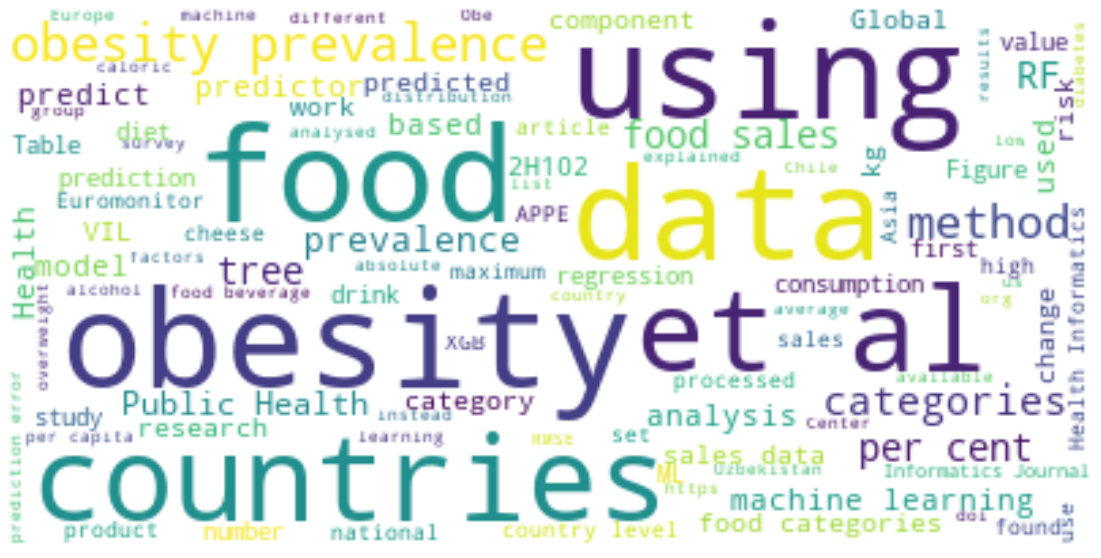

In [179]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(paper)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [180]:
stopwords.extend([
    'Figure',
    'et al',
    'et',
    'al',
    'per cent',
    'using',
    '2H102',
    'doi',
    'Dunstan'
])   

In [181]:
paper = [] 
keywords = set([word for word in tokens if not word in stopwords and not word in punctuations])
#paper = " ".join(word for word in keywords)
paper = " ".join(filter(str.isalpha,(word for word in keywords)))


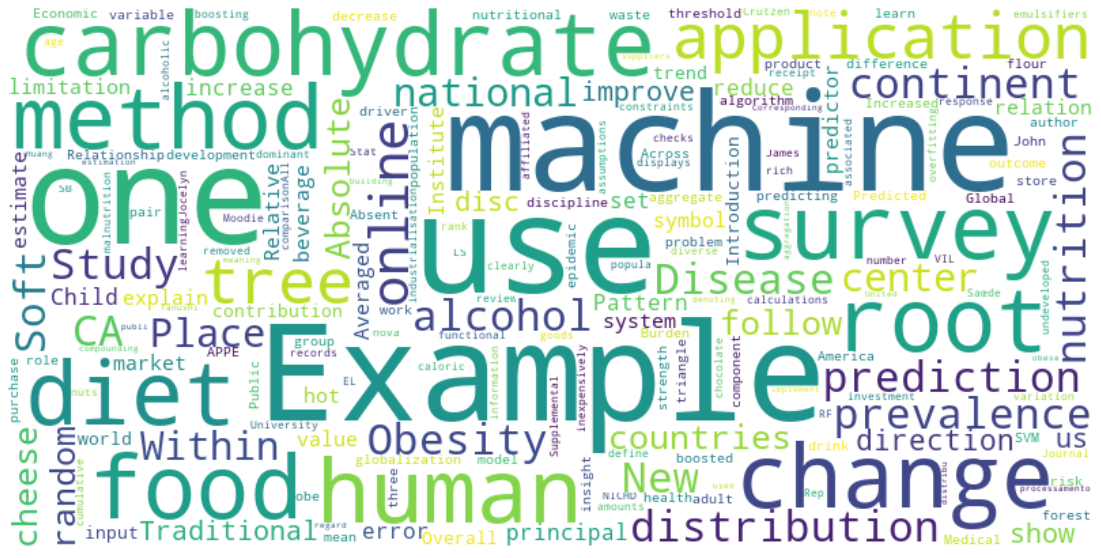

In [182]:
wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color="white").generate(paper)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('paperObesityML.png') 
plt.show()

Full tutorial here: https://www.datacamp.com/community/tutorials/wordcloud-python. 